# ClimateScope:Visualizing Global Weather Trends and Extreme Events

**Project objective**  
The objective of ClimateScope is to analyze and visually represent global weather patterns 
using the Global Weather Repository dataset. This project aims to uncover seasonal trends, 
regional variations, and extreme weather events through interactive and insightful visualizations. 
By leveraging daily-updated, worldwide weather data, the project will enable users to explore 
climate behavior over time, compare conditions across regions, and identify anomalies. The 
ultimate goal is to provide an accessible, data-driven platform that supports climate awareness, 
decision-making, and further research into global weather dynamics.

**Milestone-1**

 *Data Preparation & Initial Analysis (Weeks 1-2)* 
 
● Tasks: 

○ Download the Global Weather Repository dataset from Kaggle. 

○ Set up project environment. 

○ Inspect dataset structure, data types, and key variables. 

○ Identify missing values, anomalies, and data coverage. 

○ Handle missing or inconsistent entries. 

○ Convert units and normalize values. 

○ Aggregate or filter data (e.g., daily to monthly averages).


**Inspecting Dataset Structure**

In [87]:
import pandas as pd
data=pd.read_csv('GlobalWeatherRepository.csv')#loading the dataset

In [88]:
data.head() #to see first 5 rows,so we know what the data looks like

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [89]:
data.info() #to understand the structure before cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97435 entries, 0 to 97434
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       97435 non-null  object 
 1   location_name                 97435 non-null  object 
 2   latitude                      97435 non-null  float64
 3   longitude                     97435 non-null  float64
 4   timezone                      97435 non-null  object 
 5   last_updated_epoch            97435 non-null  int64  
 6   last_updated                  97435 non-null  object 
 7   temperature_celsius           97435 non-null  float64
 8   temperature_fahrenheit        97435 non-null  float64
 9   condition_text                97435 non-null  object 
 10  wind_mph                      97435 non-null  float64
 11  wind_kph                      97435 non-null  float64
 12  wind_degree                   97435 non-null  int64  
 13  w

In [90]:
data.shape #to know the size of the dataset (rows,cols)

(97435, 41)

In [91]:
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,97435.000000,97435.000000,9.743500e+04,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,...,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000
mean,19.146115,22.112882,1.737542e+09,22.788837,73.021634,8.241385,13.266501,170.863827,1013.967650,29.941811,...,18.555623,517.522988,62.769735,15.819119,11.268231,26.167342,53.765763,1.760979,2.762200,49.699636
std,24.457297,65.819599,1.252229e+07,8.893859,16.008748,7.881144,12.681089,102.719479,11.381238,0.336032,...,14.682107,844.567024,32.260021,26.074344,40.805656,40.829209,164.167510,0.981699,2.567807,35.089898
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.726743e+09,18.100000,64.600000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.500000,238.650000,42.000000,1.295000,0.800000,7.400000,10.900000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.737541e+09,25.000000,77.000000,6.900000,11.200000,165.000000,1013.000000,29.920000,...,15.900000,327.450000,60.000000,4.995000,2.405000,15.170000,22.200000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.748422e+09,28.300000,82.900000,11.400000,18.400000,256.000000,1017.500000,30.050000,...,24.400000,507.400000,79.000000,17.945000,9.065000,29.970000,46.065000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.759132e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


**Checking Missing Values**

In [92]:
data.isnull().sum() #to know how many missing entries each column has

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

**Checking for Duplicates**

In [93]:
data.duplicated().sum() #checking for duplicates

0

**Checking Datatypes**

In [94]:
data.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


**Converting Datatype**

In [95]:
data['last_updated'] = pd.to_datetime(data['last_updated']) #converting the date column to date data type

In [96]:
print(data['last_updated'].dtype) #checking whether it is coneverted or not

datetime64[ns]


In [97]:
data['last_updated'].head(20)

0    2024-05-16 13:15:00
1    2024-05-16 10:45:00
2    2024-05-16 09:45:00
3    2024-05-16 10:45:00
4    2024-05-16 09:45:00
5    2024-05-16 04:45:00
6    2024-05-16 05:45:00
7    2024-05-16 12:45:00
8    2024-05-16 18:45:00
9    2024-05-16 10:45:00
10   2024-05-16 12:45:00
11   2024-05-16 04:45:00
12   2024-05-16 11:45:00
13   2024-05-16 14:45:00
14   2024-05-16 04:45:00
15   2024-05-16 11:45:00
16   2024-05-16 10:45:00
17   2024-05-16 02:45:00
18   2024-05-16 09:45:00
19   2024-05-16 14:45:00
Name: last_updated, dtype: datetime64[ns]

In [98]:
data['date']=pd.to_datetime(data['last_updated'].dt.date)
data['date'].value_counts().head(10)

date
2024-05-16    378
2024-05-18    205
2024-09-16    200
2024-07-16    198
2025-01-29    198
2024-06-29    198
2024-07-05    198
2024-07-09    198
2024-06-16    197
2024-12-15    197
Name: count, dtype: int64

**Handling Anomalies(Outliers)**

Humidity should be 0-100

-checking whether humidity is between 0-100 or not


In [99]:
import numpy as np

humidity_values = data['humidity'].values
invalid_humidity = humidity_values[(humidity_values < 0) | (humidity_values > 100)]

if invalid_humidity.size > 0:
    print(invalid_humidity)
else:
    print('No Value')


No Value


-Temperature range (-90 to 60c is realistic on Earth)

    -checking for temperature

In [100]:
import numpy as np

temps = data['temperature_celsius'].values
invalid_temps = temps[(temps < -90) | (temps > 60)]

if invalid_temps.size > 0:
    print(invalid_temps)
else:
    print('No Value')


No Value


**Aggregate (Daily ---> Monthly Averages)**

If each (country, location, date) = 1 row only → daily dataset.

If there are multiple rows for same location & date → it’s more granular (hourly)

In [101]:
daily_check=data.groupby(['country','location_name','date']).size()#checking for daily updates
daily_check.head(20)


country      location_name  date      
Afghanistan  Kabul          2024-05-16    2
                            2024-05-17    1
                            2024-05-18    1
                            2024-05-19    1
                            2024-05-20    1
                            2024-05-21    1
                            2024-05-22    1
                            2024-05-23    1
                            2024-05-24    1
                            2024-05-25    1
                            2024-05-26    1
                            2024-05-27    1
                            2024-05-28    1
                            2024-05-29    1
                            2024-05-30    1
                            2024-05-31    1
                            2024-06-01    1
                            2024-06-02    1
                            2024-06-03    1
                            2024-06-04    1
dtype: int64

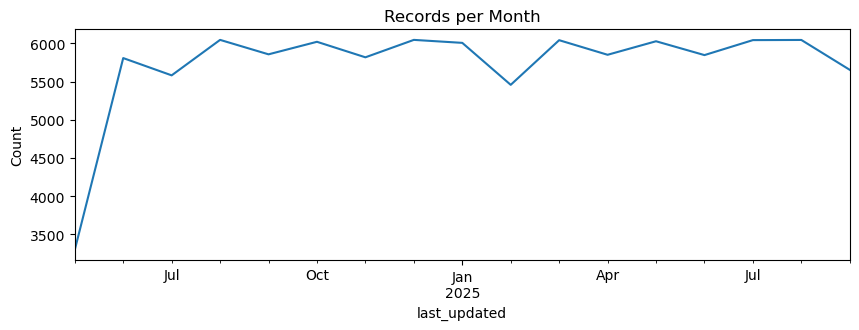

In [102]:
data['last_updated'] = pd.to_datetime(data['last_updated'])  # adjust column name
data.set_index('last_updated', inplace=False).resample('ME').size().plot(figsize=(10,3))
plt.title('Records per Month'); plt.ylabel('Count'); plt.show()


The above plot shows the number of records per month, helping us understand data coverage and spot months with fewer entries.

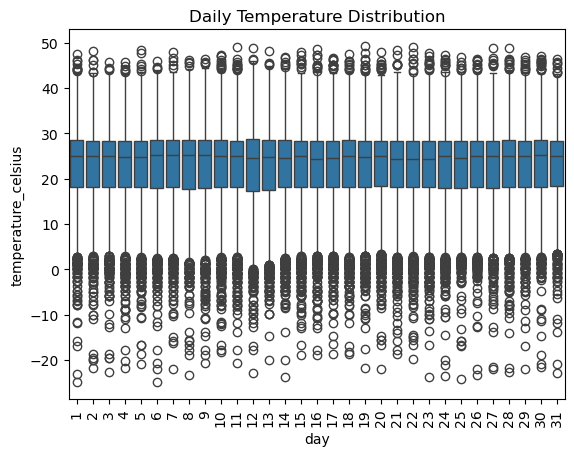

In [103]:
# Extract day from the date
data['day'] = data['last_updated'].dt.day

# Create boxplot by day
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='day', y='temperature_celsius', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title("Daily Temperature Distribution")
plt.show()


The above boxplot shows the distribution of temperatures for each day of the month. It helps us visualize daily variations

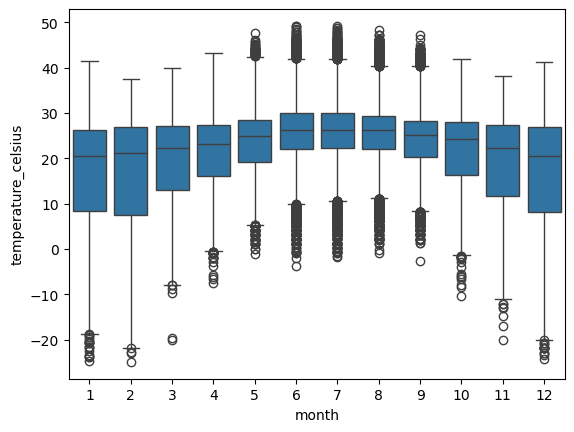

In [104]:
data['month'] = data['last_updated'].dt.month
sns.boxplot(x='month', y='temperature_celsius', data=data); plt.show()


The above boxplot shows the distribution of temperatures for each month. It helps us see monthly variations

**Checking Time Gaps**

 If most gaps are 1 day → daily data.
 
 If most gaps are 1 hour / few minutes → hourly data

In [105]:
data=data.sort_values('last_updated')
data['time_diff']=data['last_updated'].diff()
data['time_diff'].value_counts().head(10)

time_diff
0 days 00:00:00    80890
0 days 00:15:00     5797
0 days 01:00:00     4324
0 days 00:30:00     3255
0 days 00:45:00     2028
0 days 02:00:00      427
0 days 01:45:00      145
0 days 04:00:00      139
0 days 03:45:00      100
0 days 04:15:00       83
Name: count, dtype: int64

**Creating daily averages per location**

In [106]:
daily_avg=data.groupby(['country','location_name','date']).mean(numeric_only=True).reset_index()
daily_avg.head(5)

,country,location_name,date,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,...,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,day,month
0,Afghanistan,Kabul,2024-05-16,34.52,69.18,1.715859e+09,24.3,75.7,6.4,10.25,...,81.55,10.25,0.4,8.9,22.75,1.0,1.0,55.0,16.0,5.0
1,Afghanistan,Kabul,2024-05-17,34.52,69.18,1.715962e+09,15.0,58.9,3.4,5.40,...,70.80,9.40,0.6,8.3,18.10,1.0,1.0,64.0,17.0,5.0
2,Afghanistan,Kabul,2024-05-18,34.52,69.18,1.716043e+09,19.5,67.1,2.2,3.60,...,76.50,6.20,0.5,7.5,15.30,1.0,1.0,73.0,18.0,5.0
3,Afghanistan,Kabul,2024-05-19,34.52,69.18,1.716127e+09,16.9,62.4,4.0,6.50,...,87.30,14.90,0.6,4.8,10.10,1.0,1.0,81.0,19.0,5.0
4,Afghanistan,Kabul,2024-05-20,34.52,69.18,1.716215e+09,14.1,57.3,2.7,4.30,...,57.20,15.60,0.4,5.8,13.10,1.0,1.0,88.0,20.0,5.0


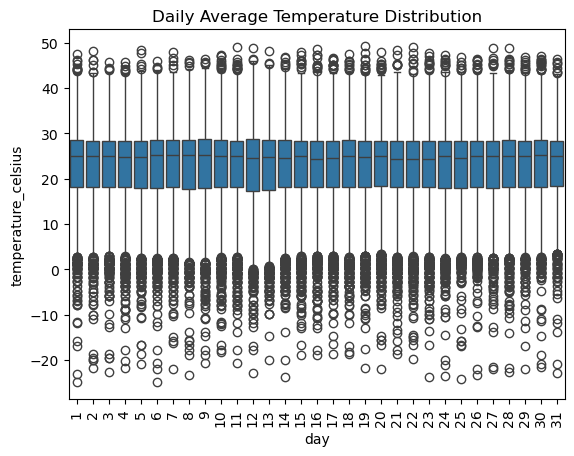

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: extract day from date if you want x-axis as day of month
daily_avg['day'] = daily_avg['date'].dt.day

# Boxplot for daily average temperature
sns.boxplot(x='day', y='temperature_celsius', data=daily_avg)
plt.xticks(rotation=90)  # rotate day labels for clarity
plt.title("Daily Average Temperature Distribution")
plt.show()


The above boxplot shows the distribution of daily average temperatures for each day of the month. It helps visualize day-to-day variations

**Aggregating to Monthly**

In [108]:
# Extract year and month
daily_avg["year"] = pd.to_datetime(daily_avg["date"]).dt.year
daily_avg["month"] = pd.to_datetime(daily_avg["date"]).dt.month

# Group by monthly
monthly_avg = daily_avg.groupby(
    ["country", "location_name", "year", "month"]
).mean(numeric_only=True).reset_index()
monthly_avg.head(10)

,country,location_name,year,month,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,...,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,day
0,Afghanistan,Kabul,2024,5,34.520000,69.180000,1.716517e+09,20.056250,68.075000,7.212500,...,1457.712500,77.196875,16.784375,0.600000,7.831250,17.078125,1.000000,1.125000,80.125000,23.50000
1,Afghanistan,Kabul,2024,6,34.520000,69.180000,1.718503e+09,25.590000,78.043333,10.636667,...,1481.570000,87.650000,17.000000,0.530000,7.380000,16.786667,1.000000,1.066667,49.800000,15.50000
2,Afghanistan,Kabul,2024,7,34.520000,69.180000,1.721101e+09,31.303448,88.362069,12.886207,...,624.758621,119.327586,4.700000,0.306897,9.065517,23.596552,1.068966,1.137931,43.758621,15.62069
3,Afghanistan,Kabul,2024,8,34.520000,69.180000,1.723811e+09,30.848387,87.538710,12.551613,...,605.025806,119.612903,3.641935,0.306452,9.638710,22.674194,1.032258,1.225806,45.548387,16.00000
4,Afghanistan,Kabul,2024,9,34.520000,69.180000,1.726442e+09,28.216667,82.783333,7.583333,...,376.173333,138.046667,2.523667,13.977000,20.996833,42.791667,1.666667,2.366667,46.100000,15.50000
5,Afghanistan,Kabul,2024,10,34.516913,69.183087,1.729071e+09,21.987097,71.554839,4.029032,...,576.245161,110.129032,6.803226,16.745484,26.031290,50.875000,2.032258,2.870968,44.774194,16.00000
6,Afghanistan,Kabul,2024,11,34.516700,69.183300,1.731705e+09,15.670000,60.210000,2.870000,...,916.798333,88.400000,9.817333,10.588167,19.048833,29.760333,1.700000,2.233333,47.333333,15.50000
7,Afghanistan,Kabul,2024,12,34.516700,69.183300,1.734345e+09,7.174194,44.916129,2.612903,...,491.383871,107.258065,4.320645,16.960323,15.396774,20.720000,1.419355,1.838710,46.548387,16.00000
8,Afghanistan,Kabul,2025,1,34.516700,69.183300,1.737023e+09,1.312903,34.370968,4.316129,...,954.600000,134.225806,12.979839,6.773387,28.251290,33.962419,2.000000,2.935484,47.935484,16.00000
9,Afghanistan,Kabul,2025,2,34.516700,69.183300,1.739571e+09,4.789286,40.617857,4.428571,...,665.867857,125.964286,6.871429,7.228214,22.219821,41.030357,1.785714,2.285714,54.392857,14.50000


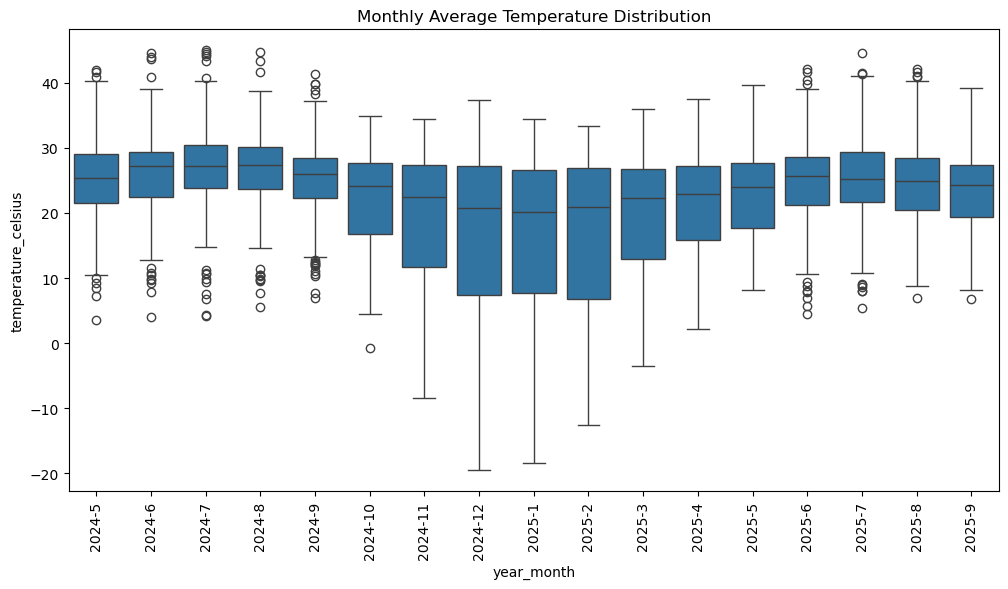

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: create a single 'year-month' column for better x-axis
monthly_avg['year_month'] = monthly_avg['year'].astype(str) + '-' + monthly_avg['month'].astype(str)

# Boxplot for monthly average temperature
plt.figure(figsize=(12,6))
sns.boxplot(x='year_month', y='temperature_celsius', data=monthly_avg)
plt.xticks(rotation=90)  # rotate labels for clarity
plt.title("Monthly Average Temperature Distribution")
plt.show()


The above boxplot shows the distribution of monthly average temperatures over time. It helps visualize month-to-month variations

**Saving Cleaned Data**

In [110]:
data.to_csv('CleanedWeatherRepository.csv',index=False)

In [111]:
cleaned=pd.read_csv('CleanedWeatherRepository.csv')
cleaned.shape

(97435, 45)

**Saving Daily Average Data**

In [119]:
daily_avg.to_csv('CleanedWeatherRepositoryDaily.csv',index=False)
daily=pd.read_csv('CleanedWeatherRepositoryDaily.csv')
daily.head()

,country,location_name,date,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,...,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,day,month,year
0,Afghanistan,Kabul,2024-05-16,34.52,69.18,1.715859e+09,24.3,75.7,6.4,10.25,...,10.25,0.4,8.9,22.75,1.0,1.0,55.0,16,5,2024
1,Afghanistan,Kabul,2024-05-17,34.52,69.18,1.715962e+09,15.0,58.9,3.4,5.40,...,9.40,0.6,8.3,18.10,1.0,1.0,64.0,17,5,2024
2,Afghanistan,Kabul,2024-05-18,34.52,69.18,1.716043e+09,19.5,67.1,2.2,3.60,...,6.20,0.5,7.5,15.30,1.0,1.0,73.0,18,5,2024
3,Afghanistan,Kabul,2024-05-19,34.52,69.18,1.716127e+09,16.9,62.4,4.0,6.50,...,14.90,0.6,4.8,10.10,1.0,1.0,81.0,19,5,2024
4,Afghanistan,Kabul,2024-05-20,34.52,69.18,1.716215e+09,14.1,57.3,2.7,4.30,...,15.60,0.4,5.8,13.10,1.0,1.0,88.0,20,5,2024


In [113]:
daily.shape

(97192, 36)

**Saving Monthly Average Data**

In [114]:
monthly_avg.to_csv('CleanedWeatherRepositoryMonthly.csv',index=False)
monthly=pd.read_csv('CleanedWeatherRepositoryMonthly.csv')
monthly.head()

,country,location_name,year,month,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,...,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,day,year_month
0,Afghanistan,Kabul,2024,5,34.52,69.18,1.716517e+09,20.056250,68.075000,7.212500,...,77.196875,16.784375,0.600000,7.831250,17.078125,1.000000,1.125000,80.125000,23.50000,2024-5
1,Afghanistan,Kabul,2024,6,34.52,69.18,1.718503e+09,25.590000,78.043333,10.636667,...,87.650000,17.000000,0.530000,7.380000,16.786667,1.000000,1.066667,49.800000,15.50000,2024-6
2,Afghanistan,Kabul,2024,7,34.52,69.18,1.721101e+09,31.303448,88.362069,12.886207,...,119.327586,4.700000,0.306897,9.065517,23.596552,1.068966,1.137931,43.758621,15.62069,2024-7
3,Afghanistan,Kabul,2024,8,34.52,69.18,1.723811e+09,30.848387,87.538710,12.551613,...,119.612903,3.641935,0.306452,9.638710,22.674194,1.032258,1.225806,45.548387,16.00000,2024-8
4,Afghanistan,Kabul,2024,9,34.52,69.18,1.726442e+09,28.216667,82.783333,7.583333,...,138.046667,2.523667,13.977000,20.996833,42.791667,1.666667,2.366667,46.100000,15.50000,2024-9


In [115]:
monthly.shape

(3398, 36)